# **TikTok Project**
**Lab 2 - Go Beyond the Numbers: Translate Data into Insights**

# **Visualize a story in Tableau and Python**

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## **PACE: Plan**

Consider the questions in the PACE Strategy Document:
1. Identify any outliers:


*   What methods are best for identifying outliers?
*   How do you make the decision to keep or exclude outliers from any future models?




#### What methods are best for identifying outliers?
Several methods can be used to identify outliers, including:

1. **Visual Inspection:**
   - **Boxplots:** Boxplots are a simple way to visualize the distribution of a dataset and identify potential outliers. In a boxplot, outliers are typically represented as points that fall outside the whiskers of the plot.
   - **Scatter plots:** Scatter plots can help identify outliers in bivariate data.

2. **Statistical Methods:**
   - **Z-score:** The Z-score measures how many standard deviations a data point is from the mean. Data points with a Z-score greater than 3 or less than -3 are often considered outliers.
   - **IQR (Interquartile Range):** The IQR method calculates the range between the first quartile (Q1) and the third quartile (Q3). Data points that fall below Q1 - 1.5\*IQR or above Q3 + 1.5\*IQR are considered outliers.

3. **Machine Learning Methods:**
   - **Isolation Forest:** An unsupervised learning algorithm specifically designed to detect outliers in a dataset.
   - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** A clustering algorithm that can detect outliers as points that do not belong to any cluster.

#### How do you make the decision to keep or exclude outliers from any future models?
The decision to keep or exclude outliers depends on the context and the impact of the outliers on the analysis. Here are some considerations:

1. **Contextual Relevance:**
   - **Investigate the cause:** Determine whether the outliers are due to data entry errors, measurement errors, or if they represent genuine anomalies.
   - **Domain knowledge:** Use domain knowledge to assess whether the outliers provide valuable information or if they distort the analysis.

2. **Impact on Analysis:**
   - **Model performance:** Evaluate the impact of outliers on model performance. In some cases, outliers can significantly skew the results, leading to inaccurate models.
   - **Statistical tests:** Perform statistical tests to determine whether outliers have a significant impact on the results. If they do, consider excluding them.

3. **Mitigation Strategies:**
   - **Transformation:** Apply transformations (e.g., log transformation) to reduce the impact of outliers.
   - **Robust models:** Use robust statistical methods or models that are less sensitive to outliers.

In summary, the decision to keep or exclude outliers should be based on a thorough investigation of their cause, their impact on the analysis, and the goals of the study. If outliers are deemed to distort the results or do not provide valuable insights, it may be appropriate to exclude them. However, if they represent genuine variations in the data, they should be included in the analysis.
hey should be included in the analysis.


### **Task 1. Imports, links, and loading**

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

In [2]:
# Load dataset into dataframe
df = pd.read_csv("tiktok_dataset.csv")

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)


## **PACE: Analyze**

### **Task 2a: Data exploration and cleaning**


In [3]:
# Display and examine the first few rows of the dataframe
df.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data
df.size


229008

In [5]:
# Get the shape of the data
df.shape


(19084, 12)

Get basic information about the data, using `.info()`.

In [6]:
# Get basic information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


Generate a table of descriptive statistics, using `.describe()`.

In [7]:
# Generate a table of descriptive statistics
df.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
# Calculate the median view count
median_view_count = df['video_view_count'].median()
print("Median View Count:", median_view_count)

Median View Count: 9954.5


In [9]:
# Identify the highest engagement video
highest_engagement_video = df.loc[df['video_view_count'].idxmax()]
print("Highest Engagement Video Details:")
print(highest_engagement_video)

Highest Engagement Video Details:
#                                                                        9274
claim_status                                                            claim
video_id                                                           5491664721
video_duration_sec                                                         16
video_transcription_text    i discovered on the radio a claim that 1920 wa...
verified_status                                                  not verified
author_ban_status                                                      active
video_view_count                                                     999817.0
video_like_count                                                     385415.0
video_share_count                                                     63849.0
video_download_count                                                   5330.0
video_comment_count                                                    2475.0
Name: 9273, dtype: object


### **Task 2b. Assess data types**

### **Task 2c. Select visualization type(s)**

### Selecting Data Visualizations for EDA

Based on the information gathered from the initial data exploration, several types of data visualizations can be used to gain insights into the TikTok dataset. The goal is to understand the distribution, relationships, and potential outliers in the data. Here are the recommended visualizations:

1. **Box Plot:**
   - **Purpose:** Identify outliers and visualize the spread and central tendency of the data.
   - **Columns to Use:** `video_duration_sec`, `video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, `video_comment_count`
   - **Rationale:** Box plots are effective in showing the distribution and identifying outliers in numerical data. This is particularly useful for columns like video duration, view count, like count, etc.

2. **Histogram:**
   - **Purpose:** Visualize the frequency distribution of a single numerical variable.
   - **Columns to Use:** `video_duration_sec`, `video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, `video_comment_count`
   - **Rationale:** Histograms help in understanding the distribution of numerical variables and identifying skewness or normality in the data.

3. **Bar Chart:**
   - **Purpose:** Compare categorical data and show counts or aggregations of numerical data.
   - **Columns to Use:** `claim_status`, `verified_status`, `author_ban_status`
   - **Rationale:** Bar charts are useful for comparing the counts of different categories, such as the number of claims vs. opinions or the number of verified vs. non-verified accounts.

4. **Scatter Plot:**
   - **Purpose:** Examine the relationship between two numerical variables.
   - **Columns to Use:** Pairs like `video_view_count` vs. `video_like_count`, `video_share_count` vs. `video_comment_count`
   - **Rationale:** Scatter plots are useful for identifying correlations or patterns between two numerical variables.

5. **Heat Map:**
   - **Purpose:** Visualize the correlation between multiple numerical variables.
   - **Columns to Use:** All numerical columns
   - **Rationale:** Heat maps are effective for showing the strength and direction of correlations between variables, helping to identify relationships that may not be obvious from other visualizations.

6. **Line Graph:**
   - **Purpose:** Track changes or trends over time.
   - **Columns to Use:** This is more relevant if there is a time-related variable, but could be adapted for sequences or comparisons.
   - **Rationale:** Line graphs are useful if there are any time-series data to show trends over time. 

7. **Geographic Map:**
   - **Purpose:** Display data related to geographic locations.
   - **Columns to Use:** Not directly applicable to the current dataset unless location-based data is added.
   - **Rationale:** Geographic maps are not applicable based on the current dataset as it does not contain location data.

### Visualization Plan:
- **Box plots** for each numerical variable to check for outliers and understand the distribution.
- **Histograms** for each numerical variable to visualize frequency distributions.
- **Bar charts** to compare categorical variables like `claim_status`, `verified_status`, and `author_ban_status`.
- **Scatter plots** to examine relationships between numerical variables.
- **Heat map** to visualize correlations between numerical variables.

These visualizations will provide a comprehensive understanding of the dataset, highlighting important patterns, relationships, and potential anomalies.


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Build visualizations**

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

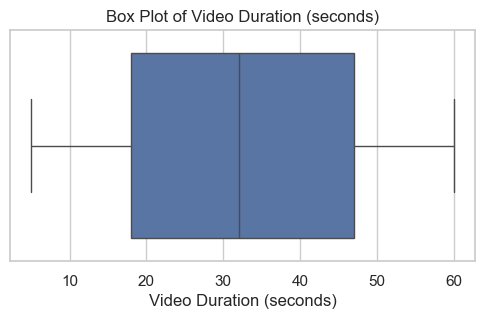

In [10]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(6,3))
sns.boxplot(x=df['video_duration_sec'])
plt.title('Box Plot of Video Duration (seconds)')
plt.xlabel('Video Duration (seconds)')
plt.show()


Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

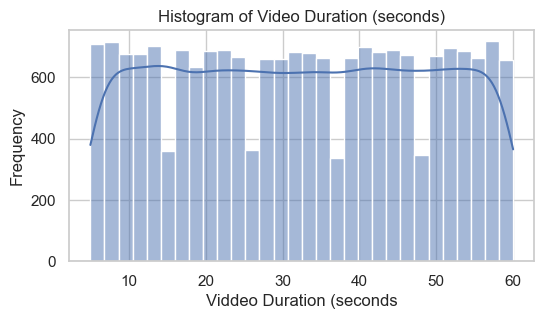

In [11]:
# Create a histogram
plt.figure(figsize=(6, 3))
sns.histplot(df['video_duration_sec'], bins=30, kde=True)
plt.title('Histogram of Video Duration (seconds)')
plt.xlabel('Viddeo Duration (seconds')
plt.ylabel('Frequency')
plt.show()


**Question:** What do you notice about the duration and distribution of the videos?



Based on the visualizations:

- The video durations in the dataset range from approximately 5 to 60 seconds, with a median duration of around 30 seconds. This indicates that half of the videos are shorter than 30 seconds, and half are longer.
- The distribution of video durations appears to be relatively uniform, as indicated by the histogram, with frequencies remaining consistent across different duration intervals.
- There are no significant outliers in the video durations, as shown by the box plot, with the whiskers covering the entire range of durations without any individual points lying outside.
- The slight dips in frequency at certain durations might suggest specific content lengths preferred by creators or possible platform constraints.

In summary, the videos are typically short-form content, and there is a consistent spread of video durations, which aligns with the format like TikTok.


#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

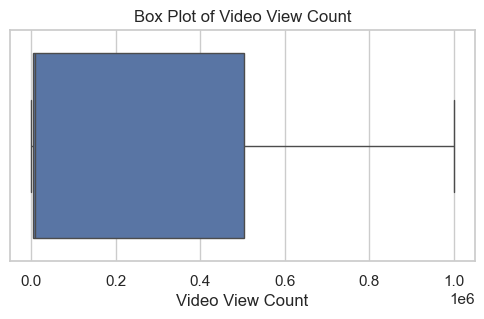

In [12]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(6,3))
sns.boxplot(x=df['video_view_count'])
plt.title('Box Plot of Video View Count')
plt.xlabel('Video View Count')
plt.show()



Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

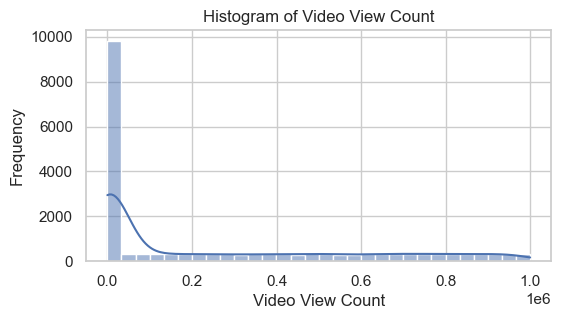

In [13]:
# Create a histogram
plt.figure(figsize=(6, 3))
sns.histplot(df['video_view_count'], bins=30, kde=True)
plt.title('Histogram of Video View Count')
plt.xlabel('Video View Count')
plt.ylabel('Frequency')
plt.show()


**Question:** What do you notice about the distribution of this variable?


Based on the visualizations:

- The video view counts in the dataset range from 0 to approximately 1,000,000 views, with a median view count significantly lower than the upper quartile. This indicates that half of the videos have relatively low view counts.
- The distribution of video view counts is heavily right-skewed, as indicated by the histogram. Most videos have low view counts, with the frequency rapidly decreasing as the view count increases.
- There are no visible outliers in the box plot, suggesting that the high view counts, while rare, are part of the overall distribution rather than anomalies.
- The steep decline in frequency after the initial peak in the histogram indicates that very few videos achieve high view counts, with a long tail extending towards higher values.
- This pattern suggests that viral videos with high engagement are uncommon, while the majority of content receives modest viewership.

In summary, the distribution of video view counts highlights a typical social media engagement pattern, where a small number of videos achieve viral status, while most receive modest engagement.
e very rare.


#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

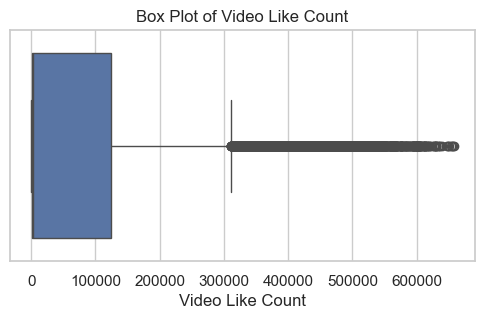

In [14]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['video_like_count'])
plt.title('Box Plot of Video Like Count')
plt.xlabel('Video Like Count')
plt.show()


Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

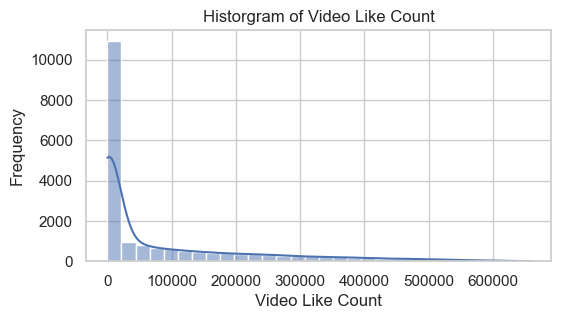

In [15]:
# Create a histogram
plt.figure(figsize=(6,3))
sns.histplot(df['video_like_count'], bins=30, kde=True)
plt.title('Historgram of Video Like Count')
plt.xlabel('Video Like Count')
plt.ylabel('Frequency')
plt.show()


**Question:** What do you notice about the distribution of this variable?


Based on the visualizations:

- The video like counts in the dataset range from 0 to approximately 600,000 likes, with a median like count significantly lower than the upper quartile. This indicates that half of the videos have relatively low like counts.
- The distribution of video like counts is heavily right-skewed, as indicated by the histogram. Most videos have low like counts, with the frequency rapidly decreasing as the like count increases.
- The box plot shows that there are many outliers on the higher end, indicating a small number of videos with exceptionally high like counts.
- The long tail on the right side of the histogram further confirms that very few videos achieve high like counts, with a majority clustering at the lower end.

In summary, the distribution of video like counts highlights a typical social media engagement pattern, where most content receives modest engagement, and a small number of videos achieve viral status with high like counts.


#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

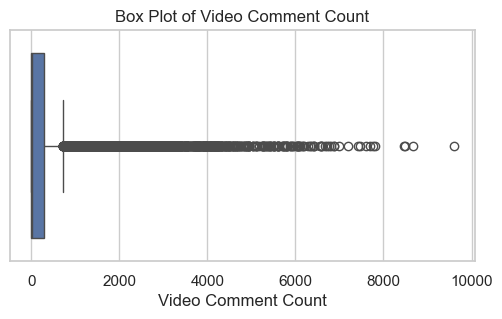

In [16]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['video_comment_count'])
plt.title('Box Plot of Video Comment Count')
plt.xlabel('Video Comment Count')
plt.show()


Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

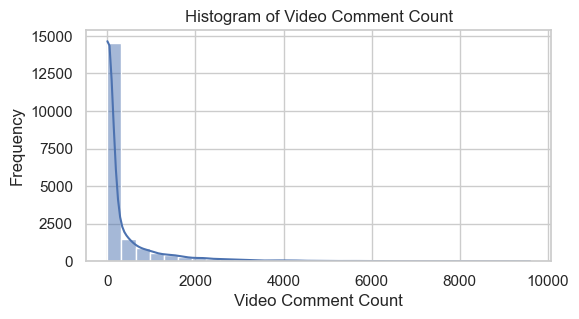

In [17]:
# Create a histogram
plt.figure(figsize=(6, 3))
sns.histplot(df['video_comment_count'], bins=30, kde=True)
plt.title('Histogram of Video Comment Count')
plt.xlabel('Video Comment Count')
plt.ylabel('Frequency')
plt.show()


**Question:** What do you notice about the distribution of this variable?


Based on the visualizations:

- The video comment counts in the dataset range from 0 to approximately 10,000 comments, with a median comment count significantly lower than the upper quartile. This indicates that half of the videos have relatively low comment counts.
- The distribution of video comment counts is heavily right-skewed, as indicated by the histogram. Most videos have low comment counts, with the frequency rapidly decreasing as the comment count increases.
- The box plot shows a large number of outliers on the higher end, indicating a small number of videos with exceptionally high comment counts.
- The long tail on the right side of the histogram further confirms that very few videos achieve high comment counts, with a majority clustering at the lower end.

In summary, the distribution of video comment counts highlights a typical social media engagement pattern, where most content receives modest engagement, and a small number of videos achieve high levels of interaction with many comments.


#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

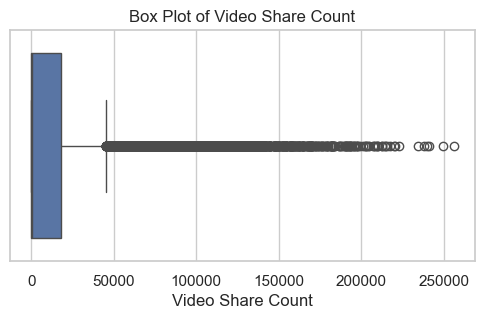

In [18]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['video_share_count'])
plt.title('Box Plot of Video Share Count')
plt.xlabel('Video Share Count')
plt.show()


*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

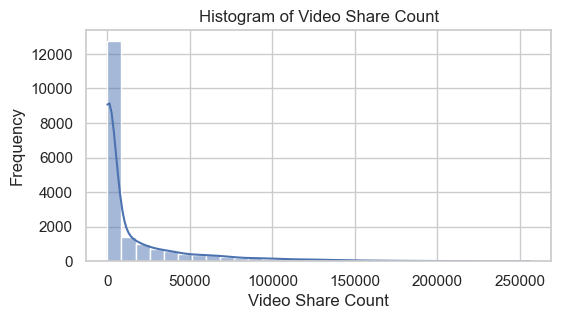

In [19]:
# Create a histogram
plt.figure(figsize=(6, 3))
sns.histplot(x=df['video_share_count'], bins=30, kde=True)
plt.title('Histogram of Video Share Count')
plt.xlabel('Video Share Count')
plt.ylabel('Frequency')
plt.show()


**Question:** What do you notice about the distribution of this variable?


Based on the visualizations:

- The video share counts in the dataset range from 0 to approximately 250,000 shares, with a median share count significantly lower than the upper quartile. This indicates that half of the videos have relatively low share counts.
- The distribution of video share counts is heavily right-skewed, as indicated by the histogram. Most videos have low share counts, with the frequency rapidly decreasing as the share count increases.
- The box plot shows a large number of outliers on the higher end, indicating a small number of videos with exceptionally high share counts.
- The long tail on the right side of the histogram further confirms that very few videos achieve high share counts, with a majority clustering at the lower end.

In summary, the distribution of video share counts highlights a typical social media engagement pattern, where most content receives modest engagement in terms of shares, and a small number of videos achieve high levels of virality with many shares.


#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

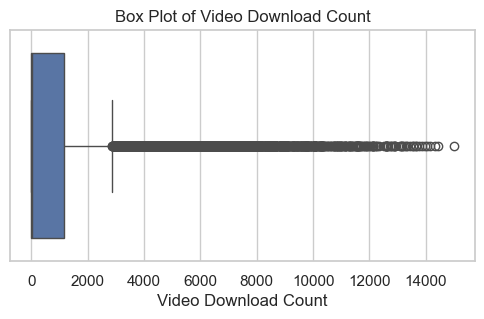

In [20]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['video_download_count'])
plt.title('Box Plot of Video Download Count')
plt.xlabel('Video Download Count')
plt.show()


Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

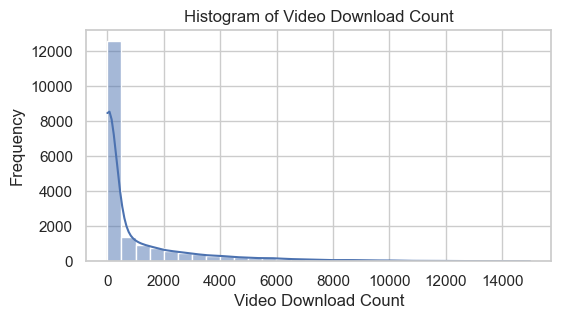

In [21]:
# Create a histogram
plt.figure(figsize=(6, 3))
sns.histplot(df['video_download_count'], bins=30, kde=True)
plt.title('Histogram of Video Download Count')
plt.xlabel('Video Download Count')
plt.ylabel('Frequency')
plt.show()


**Question:** What do you notice about the distribution of this variable?


Based on the visualizations:

- The video download counts in the dataset range from 0 to approximately 14,000 downloads, with a median download count significantly lower than the upper quartile. This indicates that half of the videos have relatively low download counts.
- The distribution of video download counts is heavily right-skewed, as indicated by the histogram. Most videos have low download counts, with the frequency rapidly decreasing as the download count increases.
- The box plot shows a large number of outliers on the higher end, indicating a small number of videos with exceptionally high download counts.
- The long tail on the right side of the histogram further confirms that very few videos achieve high download counts, with a majority clustering at the lower end.

In summary, the distribution of video download counts highlights a typical social media engagement pattern, where most content receives modest engagement in terms of downloads, and a small number of videos achieve high levels of engagement with many downloads.


#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

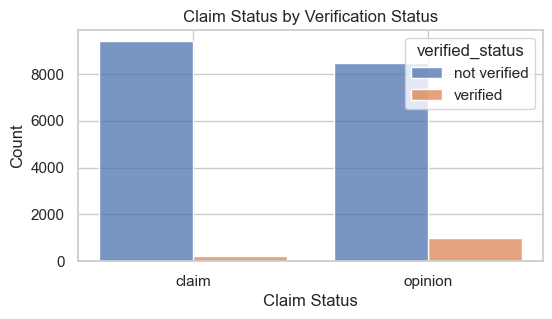

In [22]:
# Create a histogram
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='claim_status', hue='verified_status', multiple='dodge', shrink=0.8)
plt.title('Claim Status by Verification Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()


**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?


Based on the visualization:

- The majority of users who post both claims and opinions are not verified. This is evident as the blue bars (representing not verified users) are significantly taller than the orange bars (representing verified users) for both claim and opinion statuses.
- There is a notable difference in the number of claims and opinions posted by verified users. Verified users tend to post more opinions than claims, as indicated by the relatively taller orange bar for opinions compared to claims.
- Conversely, unverified users are more balanced in their posting behavior between claims and opinions, with a slight preference towards posting claims.

**Conclusion:**
Verified users are less common than unverified users among those posting both claims and opinions. However, verified users are more likely to post opinions compared to claims, while unverified users show a more balanced posting pattern with a slight inclination towards claims.


#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

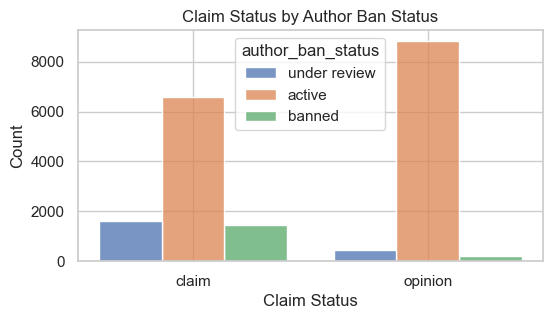

In [23]:
# Create a histogram
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='claim_status', hue='author_ban_status', multiple='dodge', shrink=0.8)
plt.title('Claim Status by Author Ban Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()


**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?


Based on the visualization:

- The majority of authors who post both claims and opinions are active, as indicated by the tall orange bars. This suggests that active users are the most engaged in posting content.
- For both claim and opinion statuses, the number of active authors is significantly higher compared to those who are under review or banned.
- There are relatively fewer authors under review and even fewer who are banned, with a small proportion of these users posting claims and opinions.
- Among banned authors, the number of those posting claims is slightly higher than those posting opinions, as shown by the green bars.

**Conclusion:**
Active authors dominate the content creation for both claims and opinions, significantly outnumbering those under review or banned. This highlights that active users are the primary contributors to the content, while banned users have a minimal presence in terms of posting claims and opinions.


#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

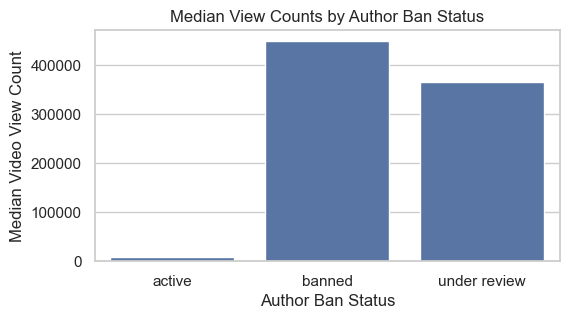

In [24]:
# Create a bar plot
median_views_by_ban_status = df.groupby('author_ban_status')['video_view_count'].median().reset_index()

plt.figure(figsize=(6, 3))
sns.barplot(x='author_ban_status', y='video_view_count', data=median_views_by_ban_status)
plt.title('Median View Counts by Author Ban Status')
plt.xlabel('Author Ban Status')
plt.ylabel('Median Video View Count')
plt.show()


**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?


Based on the visualization:

- The median view count for videos posted by banned authors is significantly higher than that for videos posted by active authors. Banned authors have a median view count of over 400,000.
- Videos posted by authors under review also have a high median view count, though slightly lower than that of banned authors, with a median view count around 350,000. stark contrast, active authors have a much lower median view count, indicating that their videos generally receive fewer views compared to those of banned or under review authors.

**Conclusion:**
The high median view counts for non-active authors (banned and under review) suggest that these users tend to post highly engaging or controversial content, which might be why they are no longer active. This insight indicates that the author ban status could be a good indicator of claim status, as users who post content leading to high engagement (and potential controversy) are more likely to be involved in claims rather than opinions.


In [25]:
# Calculate the median view count for claim status.
median_view_counts_by_claim_status = df.groupby('claim_status')['video_view_count'].median().reset_index()

In [26]:
print(median_view_counts_by_claim_status)

  claim_status  video_view_count
0        claim          501555.0
1      opinion            4953.0


#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

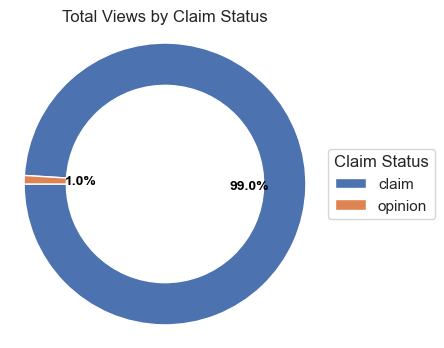

In [27]:
# Create a pie graph
total_views_by_claim_status = df.groupby('claim_status')['video_view_count'].sum().reset_index()

plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(
    total_views_by_claim_status['video_view_count'], 
    labels=None,  # Remove default labels
    autopct='%1.1f%%', 
    startangle=180, 
    textprops=dict(color="black"),
    wedgeprops=dict(width=0.3)  # Create a hollow pie chart
)

# Customize the font size and label positioning
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('black')
    autotext.set_weight('bold')

# Add a legend
plt.legend(wedges, total_views_by_claim_status['claim_status'], title="Claim Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Total Views by Claim Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Question:** What do you notice about the overall view count for claim status?


Based on the visualization:

- The pie chart shows that an overwhelming majority of the total video views are associated with claim videos, accounting for 99% of the total views.
- In contrast, opinion videos make up only 1% of the total video views.

**Conclusion:**
The overall view count for claim videos is significantly higher than that for opinion videos. This suggests that claim videos tend to attract more attention and engagement from viewers compared to opinion videos. This insight could imply that claim videos are more likely to go viral or provoke more interest, making claim status a strong indicator of high engagement levels in the dataset.


### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [28]:
# List of count variables
count_vars = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

# Iterate over each count variable to calculate outliers
for var in count_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    median = df[var].median()
    outlier_threshold = median + 1.5 * IQR
    outlier_count = (df[var] > outlier_threshold).sum()
    print(f"Number of outliers, {var}: {outlier_count}")


Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


#### **Scatterplot**

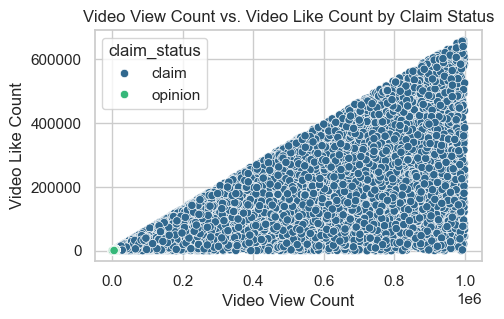

In [29]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
plt.figure(figsize=(5, 3))
sns.scatterplot(x='video_view_count', y='video_like_count', hue='claim_status', data=df, palette='viridis')
plt.title('Video View Count vs. Video Like Count by Claim Status')
plt.xlabel('Video View Count')
plt.ylabel('Video Like Count')
plt.show()


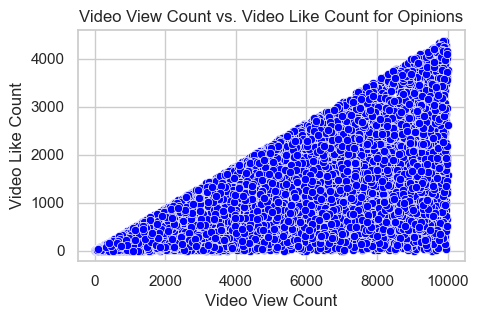

In [30]:
# Create a scatterplot of `video_view_count` versus `video_like_count` for opinions only
opinions_df = df[df['claim_status'] == 'opinion']

plt.figure(figsize=(5, 3))
sns.scatterplot(x='video_view_count', y='video_like_count', data=opinions_df, color='blue')
plt.title('Video View Count vs. Video Like Count for Opinions')
plt.xlabel('Video View Count')
plt.ylabel('Video Like Count')
plt.show()


You can do a scatterplot in Tableau Public as well, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the instructions linked in the previous Activity page.

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 5a. Results and evaluation**


I have learned that claim videos dominate total engagement on TikTok, capturing 99% of total views. This indicates that claim content is significantly more engaging than opinion content. Active users primarily post opinion videos, while banned and under-review authors post claim videos with higher median view counts, suggesting that their content is more likely to go viral. Engagement metrics (view counts, like counts, and comment counts) show a right-skewed distribution, with a few videos achieving exceptionally high interaction. Most videos are short-form, with durations between 5 to 60 seconds.

**My other questions are:**
- What specific characteristics make claim videos more engaging?
- How does the time of posting affect engagement metrics?
- Are there particular topics within claim videos that drive higher engagement?

**My client would likely want to know:**
- How can we leverage claim content to boost overall engagement?
- What strategies can active users adopt to increase their engagement metrics?
- How can we predict and replicate the success of high-engagement claim videos?

### **Task 5b. Conclusion**


**EDA is important because ...**

It allows us to uncover patterns, identify anomalies, and understand the underlying structure of the data. It provides the foundation for building predictive models and making data-driven decisions. Through EDA, we can generate insights that guide further analysis and inform strategic actions.

**Visualizations helped me understand ..**

The distribution of engagement metrics, the prominence of claim content, and the posting behavior of different user groups. They highlighted the right-skewed nature of engagement metrics and the higher engagement associated with claim videos.

__________________________________________________

By summarizing these insights, we provide a clear, data-driven narrative that helps stakeholders make informed decisions. The visualizations enable quick comprehension of complex data, ensuring that the key messages are easily accessible and actionable.